Enter:
    0. to Cancel
    1. Linear
    2. Sigmoid
    3. Tanh
    4. ReLU
    5. Softmax
     1


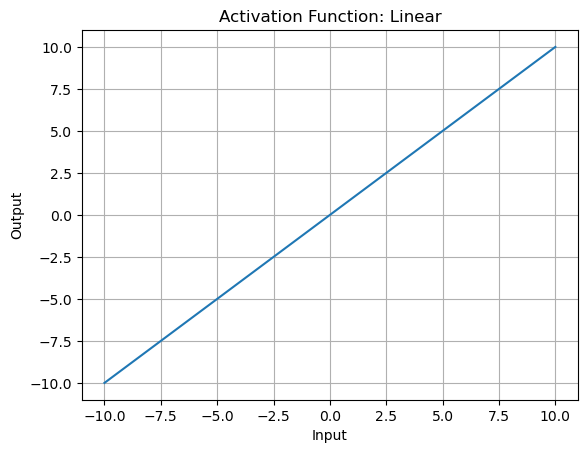

Enter:
    0. to Cancel
    1. Linear
    2. Sigmoid
    3. Tanh
    4. ReLU
    5. Softmax
     0


In [1]:
#pract1
import matplotlib.pyplot as plt
import numpy as np

class AF:
    def linear(self, x):
        return x

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def RELU(self, x):
        return np.maximum(0, x)  # More efficient way to implement ReLU

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))  # Prevent overflow
        return exp_x / np.sum(exp_x)

# Create an instance of AF class
activation_function = AF()

while True:
    n = int(input("""Enter:
    0. to Cancel
    1. Linear
    2. Sigmoid
    3. Tanh
    4. ReLU
    5. Softmax
    """))

    if n == 0:
        break

    x = np.linspace(-10, 10, 100)  # Generate 100 points between -10 and 10

    if n == 1:
        plt.plot(x, activation_function.linear(x))
        plt.title('Activation Function: Linear')
    elif n == 2:
        plt.plot(x, activation_function.sigmoid(x))
        plt.title('Activation Function: Sigmoid')
    elif n == 3:
        plt.plot(x, activation_function.tanh(x))
        plt.title('Activation Function: Tanh')
    elif n == 4:
        plt.plot(x, activation_function.RELU(x))
        plt.title('Activation Function: ReLU')
    elif n == 5:
        plt.plot(x, activation_function.softmax(x))
        plt.title('Activation Function: Softmax')
    else:
        print("Invalid choice, please enter a valid option.")
        continue

    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.grid()
    plt.show()


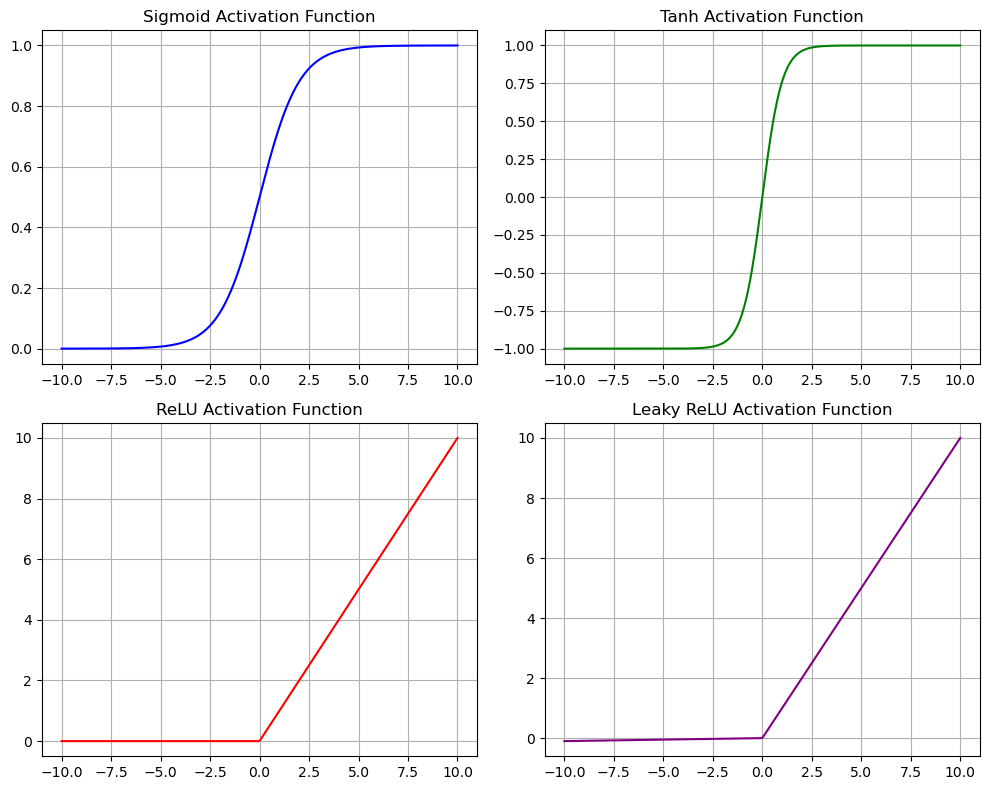

In [2]:
#pract1

import numpy as np 
import matplotlib.pyplot as plt 
# Sigmoid Function 
def sigmoid(x): 
    return 1 / (1 + np.exp(-x)) 
# Tanh Function 
def tanh(x): 
    return np.tanh(x) 
# ReLU Function 
def relu(x): 
    return np.maximum(0, x) 
 
# Leaky ReLU Function 
def leaky_relu(x, alpha=0.01): 
    return np.where(x > 0, x, alpha * x) 
 
# Generate Data 
x = np.linspace(-10, 10, 400) 
 
# Plot Functions 
plt.figure(figsize=(10, 8)) 
plt.subplot(2, 2, 1) 
plt.plot(x, sigmoid(x), label='Sigmoid', color='blue') 
plt.title('Sigmoid Activation Function') 
plt.grid(True) 
 
plt.subplot(2, 2, 2) 
plt.plot(x, tanh(x), label='Tanh', color='green') 
plt.title('Tanh Activation Function') 
plt.grid(True) 
 
plt.subplot(2, 2, 3) 
plt.plot(x, relu(x), label='ReLU', color='red') 
plt.title('ReLU Activation Function') 
plt.grid(True) 
plt.subplot(2, 2, 4) 
plt.plot(x, leaky_relu(x), label='Leaky ReLU', color='purple') 
plt.title('Leaky ReLU Activation Function') 
plt.grid(True) 
 
plt.tight_layout() 
plt.show()

In [ ]:
#pract2
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Uses the output of sigmoid instead of reapplying

# Define the XOR function
def xor(inputs):
    return np.array([int(inputs[0] != inputs[1])])

# Define the input and target data
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_data = np.array([[0], [1], [1], [0]])

# Define the neural network architecture
input_size = 2
hidden_size = 8
output_size = 1

# Initialize the weights with random values
np.random.seed(42)  # Ensures reproducibility
hidden_weights = np.random.uniform(size=(input_size, hidden_size))
output_weights = np.random.uniform(size=(hidden_size, output_size))

# Define the learning rate and number of epochs
learning_rate = 0.1
epochs = 100000

# Train the neural network using backpropagation
for epoch in range(epochs):
    # Forward propagation
    hidden_layer = sigmoid(np.dot(input_data, hidden_weights))
    output_layer = sigmoid(np.dot(hidden_layer, output_weights))

    # Backward propagation
    output_error = target_data - output_layer
    output_delta = output_error * sigmoid_derivative(output_layer)

    hidden_error = output_delta.dot(output_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)

    # Update the weights
    output_weights += hidden_layer.T.dot(output_delta) * learning_rate
    hidden_weights += input_data.T.dot(hidden_delta) * learning_rate

# Testing the neural network
test_input = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])

print("\nTesting the trained neural network on XOR problem:")
for i in range(len(test_input)):
    hidden_layer_test = sigmoid(np.dot(test_input[i], hidden_weights))
    prediction = sigmoid(np.dot(hidden_layer_test, output_weights))
    print(f"Input: {test_input[i]} -> Output: {prediction.round()} (Expected: {xor(test_input[i])})")


In [3]:
#pract4
import numpy as np

# Input Data
inputs = [[0, 0, 0, 1], [0, 1, 0, 1], [0, 0, 1, 1], [1, 0, 0, 0]]

# Hyperparameters
roh = 0.4  # Threshold
m = 3  # Number of clusters
buw = 1 / (1 + len(inputs[0]))  # Initial weight for buw
tdw = 1  # Initial weight for tdw

# Initialize arrays
buwarr = np.full((len(inputs[0]), m), buw)  # Fill with `buw`
tdwarr = np.full((m, len(inputs[0])), tdw)  # Fill with `tdw`

# Clustering process
index = 0
print("Input -> Cluster")

while True:
    if index <= len(inputs) - 1:
        norm_s = sum(inputs[index])  # Sum of input elements
        if norm_s == 0:
            index += 1
            continue  # Avoid division by zero

        oplayer = []
        for column in buwarr.T:
            oplayer.append(sum(np.array(inputs[index]) * column))  # Element-wise multiplication

        oplayer.sort()  # Sorting activation values (should be after population)
        j = np.argmax(oplayer)  # Get cluster index with highest activation

        x = np.array(inputs[index]) * tdwarr[j]  # Element-wise multiplication
        norm_x = sum(x)
        reset = norm_x / norm_s

        if reset >= roh:
            tdwarr[j] = tdwarr[j] * np.array(inputs[index])  # Element-wise update
            buwarr[:, j] = tdwarr[j] / (0.5 + sum(tdwarr[j]))  # Corrected update formula

            print(inputs[index], "->", j)
        index += 1
    else:
        break


Input -> Cluster
[0, 0, 0, 1] -> 0
[0, 1, 0, 1] -> 2
[0, 0, 1, 1] -> 2


Input -> Cluster
[0, 0, 0, 1] -> 0
[0, 1, 0, 1] -> 0
[0, 0, 1, 1] -> 0
[1, 0, 0, 0] -> 1
Classes of the model: [0 1]
Intercept of the decision boundary: [-2.]
Coefficients of the decision boundary: [[2. 1.]]


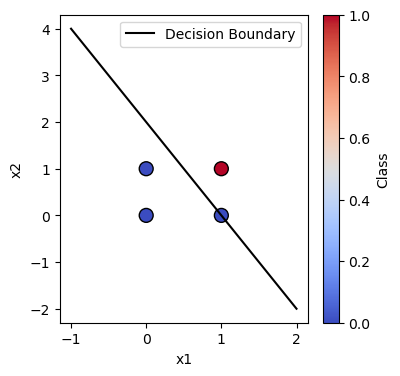

In [2]:
#pract5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Input Data
inputs = [[0, 0, 0, 1], [0, 1, 0, 1], [0, 0, 1, 1], [1, 0, 0, 0]]

# Hyperparameters
roh = 0.4  # Threshold
m = 3  # Number of clusters
buw = 1 / (1 + len(inputs[0]))  # Initial weight for buw
tdw = 1  # Initial weight for tdw

# Initialize arrays
buwarr = np.full((len(inputs[0]), m), buw)  # Fill with `buw`
tdwarr = np.full((m, len(inputs[0])), tdw)  # Fill with `tdw`

# Clustering process
index = 0
print("Input -> Cluster")

while index < len(inputs):
    norm_s = sum(inputs[index])  # Sum of input elements
    if norm_s == 0:
        index += 1
        continue  # Avoid division by zero

    oplayer = [sum(np.array(inputs[index]) * column) for column in buwarr.T]

    j = np.argmax(oplayer)  # Get cluster index with highest activation
    x = np.array(inputs[index]) * tdwarr[j]  # Element-wise multiplication
    norm_x = sum(x)
    reset = norm_x / norm_s

    if reset >= roh:
        tdwarr[j] = tdwarr[j] * np.array(inputs[index])  # Element-wise update
        buwarr[:, j] = tdwarr[j] / (0.5 + sum(tdwarr[j]))  # Corrected update formula
        print(inputs[index], "->", j)
    index += 1

# Implementing Perceptron Model
x = [[1, 1], [0, 0], [0, 1], [1, 0]]
y = [1, 0, 0, 0]

# Extract x1, x2 for plotting
x1, x2 = zip(*x)

plt.figure(figsize=(4, 4), dpi=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x1, x2, c=y, cmap='coolwarm', edgecolors='k', s=100)
plt.colorbar(label="Class")

# Train the Perceptron Model
clf = Perceptron(max_iter=100, random_state=0).fit(x, y)
print("Classes of the model:", clf.classes_)
print("Intercept of the decision boundary:", clf.intercept_)
print("Coefficients of the decision boundary:", clf.coef_)

# Plot decision boundary
ymin, ymax = -1, 2
w = clf.coef_[0]

if w[1] != 0:  # Prevent division by zero
    a = -w[0] / w[1]
    xx = np.linspace(ymin, ymax, num=100)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    plt.plot(xx, yy, 'k-', label="Decision Boundary")

plt.legend()
plt.show()
